# Indian Creek, Ohio, Test#2

## Load *Streamlines* package

In [1]:
import streamlines

## Initiate *Streamlines* workflow

Choose the JSON parameters file we want to work with. The extension `.json` is automatically added.

In [2]:
JSON_parameters_file = 'IndianCreek_Test2'

Initialize streamline analysis.

In [3]:
sl = streamlines.run( parameters_file=JSON_parameters_file, \
                        do_geodata = False, \
                        do_preprocess = False, \
                        do_condition=True, \
                        do_trace = False, \
                        do_analysis=False, \
                        do_mapping=False, \
                        do_plot=False, \
                        do_display=True, \
                        do_save=False )


Mon 2018-09-10 16:09:09 JST+0900

**Initialization begin**
Loaded JSON parameters file "/Users/colinstark/Work/Streamlines/slm/tests/IndianCreek_Test2.json"
slm git:
[['commit 9da641c1d6cf27f4376e1cac18eefe27122004fa',
  'Author: Colin Stark',
  'Date:   Wed Aug 29 15:54:10 2018 +0900',
  '    Debugging']]
**Initialization end**



## Import DTM

In [4]:
sl.geodata.do()


**Geodata begin**
/Users/colinstark/Work/Streamlines/slm/tests
.. data
Reading DTM from GeoTIFF file "/Users/colinstark/Work/Streamlines/slm/data/IndianCreek_res1m_fillsinks0p01_cuttest2.tif"
(361338.4063, 1.0, 0.0, 4290720.0, 0.0, -1.0)
DTM size: 200 x 200 = 40,000 pixels
DTM pixel size: 1.0m
DTM origin:
  - bottom-left pixel center: [361338.41mE, 4290520.00mN]
  - bottom-left pixel corner: [361337.91mE, 4290519.50mN]
ROI pixel bounds:  [[0, 199], [0, 199]]
ROI pixel grid:  200 x 200 = 40,000 pixels
ROI pixel-edge boundaries (assuming pixel-as-area)
  - in pixel units: [x: 0.0<=>200.0] , [y: 0.0<=>200.0]
  - in meters:      [x: 0.0<=>200.0] , [y: 0.0<=>200.0]
Reading basins from GeoTIFF file "/Users/colinstark/Work/Streamlines/slm/data/IndianCreek_DTM0_res1m_fill_sinks1deg_watershed3k_cuttest2.tif"
(361338.4063, 1.0, 0.0, 4290720.0, 0.0, -1.0)
Mask out all but basin numbers [1131, 1132]
**Geodata end**



ERROR 1: NUMPY driver was compiled against GDAL 2.2, but the current library version is 2.4


In [5]:
wsf=2
# sl.plot.plot_roi_shaded_relief(interp_method='none')

## Preprocess DTM (fix loops etc)

In [6]:
%time sl.preprocess.do()


**Preprocess begin**
Precondition gradient vector field by fixing loops & blockages
Finding blockages...found 62...done
Finding and fixing loops...
...done
Fixing blockages...
...done
Mask out bad uv pixels...done
**Preprocess end**

CPU times: user 2.5 s, sys: 53 ms, total: 2.55 s
Wall time: 2.55 s


Recording figure "classical_streamlines_and_vectors"


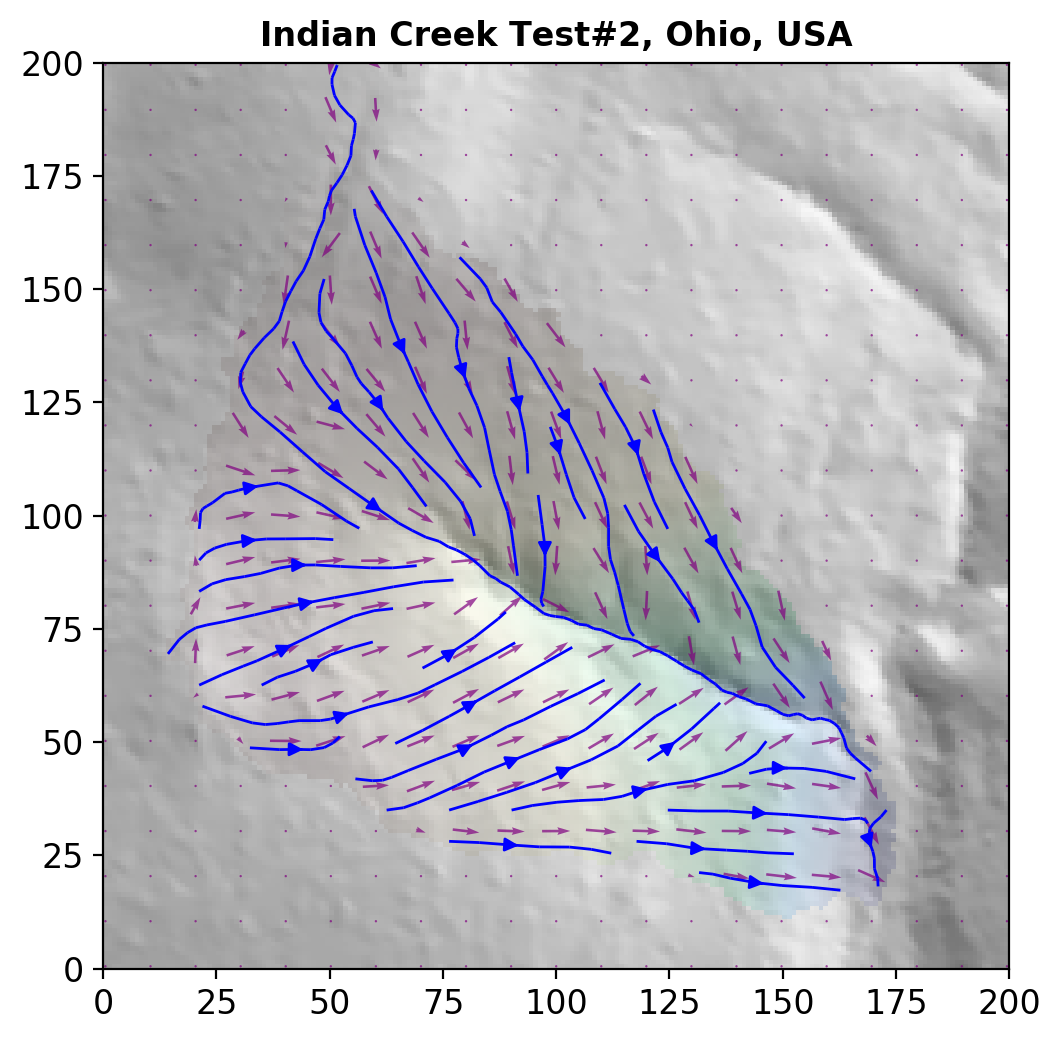

In [7]:
sl.plot.plot_classical_streamlines_and_vectors(window_size_factor=wsf)

## Trace streamlines

In [8]:
%time sl.trace.do()


**Trace begin**
Integrating trajectories...
Generating seed points...shuffling...padding for 32 CL work items/group: 1000->1024...done
GPU/OpenCL device global memory limit for streamline trajectories: 3.6GB
GPU/OpenCL device memory required for streamline trajectories: 4MB => no need to chunkify
Total number of kernel instances: 1,024
Number of chunks = seed point array divisor: 1
Chunk size = number of kernel instances per chunk: 1,024
Downstream: downup=0 sgn(uv)=+1.0 chunk=0 seeds: 0+1000 => 1000
Seed point buffer size = 1000.0*8 bytes
0.0% 62.5% 100.0% 
Upstream:   downup=1 sgn(uv)=-1.0 chunk=0 seeds: 0+1000 => 1000
Seed point buffer size = 1000.0*8 bytes
0.0% 62.5% 100.0% 
Building streamlines compressed array
Streamlines actual array allocation:  size=353kB
Computing streamlines statistics
   downstream                          upstream                         
          min        mean         max       min        mean          max
l    0.509221  109.832016  253.752243  1.2880

In [9]:
import pandas as pd
ddf=pd.DataFrame(sl.trace.traj_stats_df.loc['downstream'].T)
udf=pd.DataFrame(sl.trace.traj_stats_df.loc['upstream'].T)
ddf.style.format("{:.3g}").set_properties(**{'font-size':'140%'})\
    .set_caption('Downstreamline statistics:')
udf.style.format("{:.3g}").set_properties(**{'font-size':'140%'})\
    .set_caption('Upstreamline statistics:')

,min,mean,max
l,0.509,110,254
n,2,244,563
ds,0.255,0.448,0.458


,min,mean,max
l,1.29,53.7,914
n,2,118,2e+03
ds,0.265,0.463,0.779


Plotting all 1,000 down streamlines
Progress: 1%...2%...3%...4%...5%...6%...7%...8%...9%...10%...11%...12%...13%...14%...15%...16%...17%...18%...19%...20%...21%...22%...23%...24%...25%...26%...27%...28%...29%...30%...31%...32%...33%...34%...35%...36%...37%...38%...39%...40%...41%...42%...43%...44%...45%...46%...47%...48%...49%...50%...51%...52%...53%...54%...55%...56%...57%...58%...59%...60%...61%...62%...63%...64%...65%...66%...67%...68%...69%...70%...71%...72%...73%...74%...75%...76%...77%...78%...79%...80%...81%...82%...83%...84%...85%...86%...87%...88%...89%...90%...91%...92%...93%...94%...95%...96%...97%...98%...99%...100%
Plotting all 1,000 up streamlines
Progress: 1%...2%...3%...4%...5%...6%...7%...8%...9%...10%...11%...12%...13%...14%...15%...16%...17%...18%...19%...20%...21%...22%...23%...24%...25%...26%...27%...28%...29%...30%...31%...32%...33%...34%...35%...36%...37%...38%...39%...40%...41%...42%...43%...44%...45%...46%...47%...48%...49%...50%...51%...52%...53%...54%...55%..

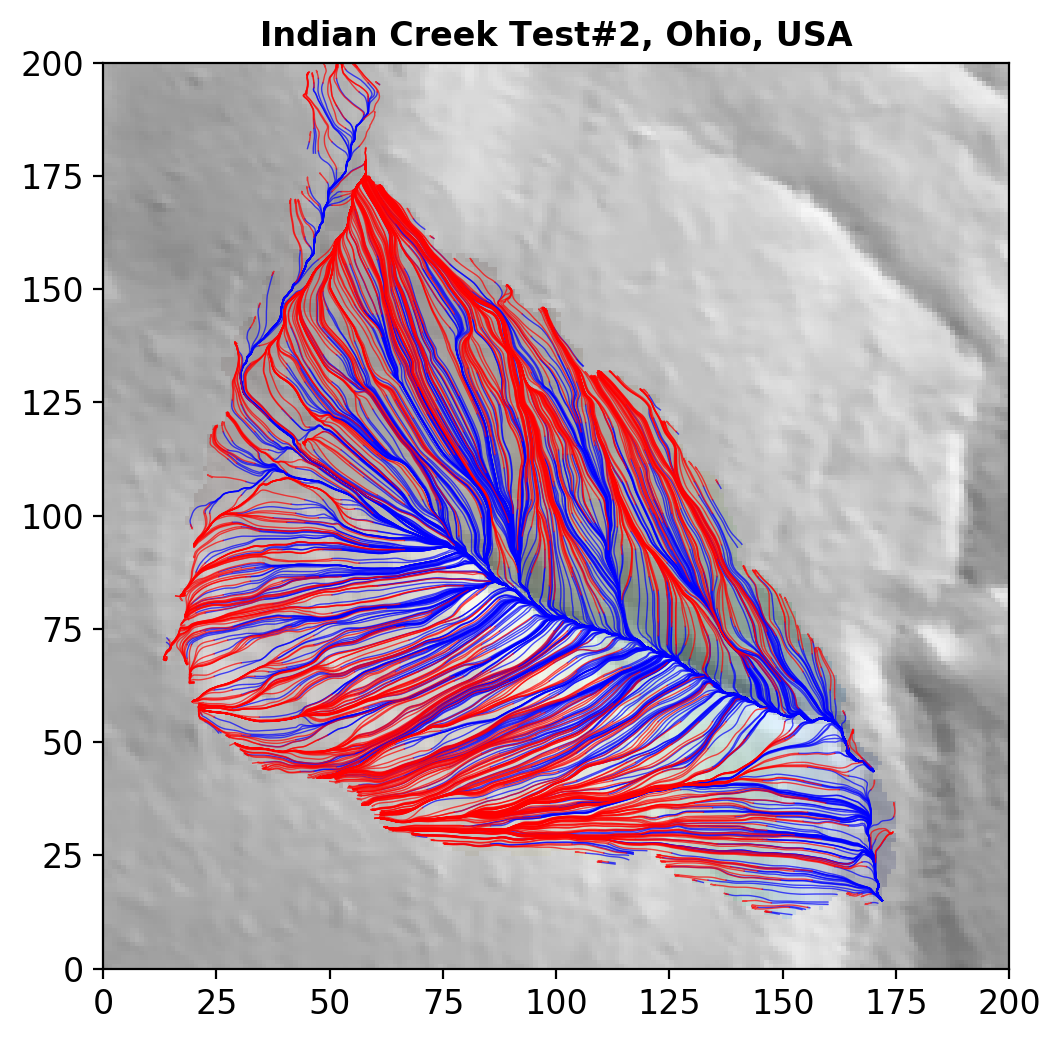

In [10]:
sl.plot.plot_streamlines(window_size_factor=wsf)

## Viz streamline flow concentrations

Recording figure "dsla"
Recording figure "dslt"


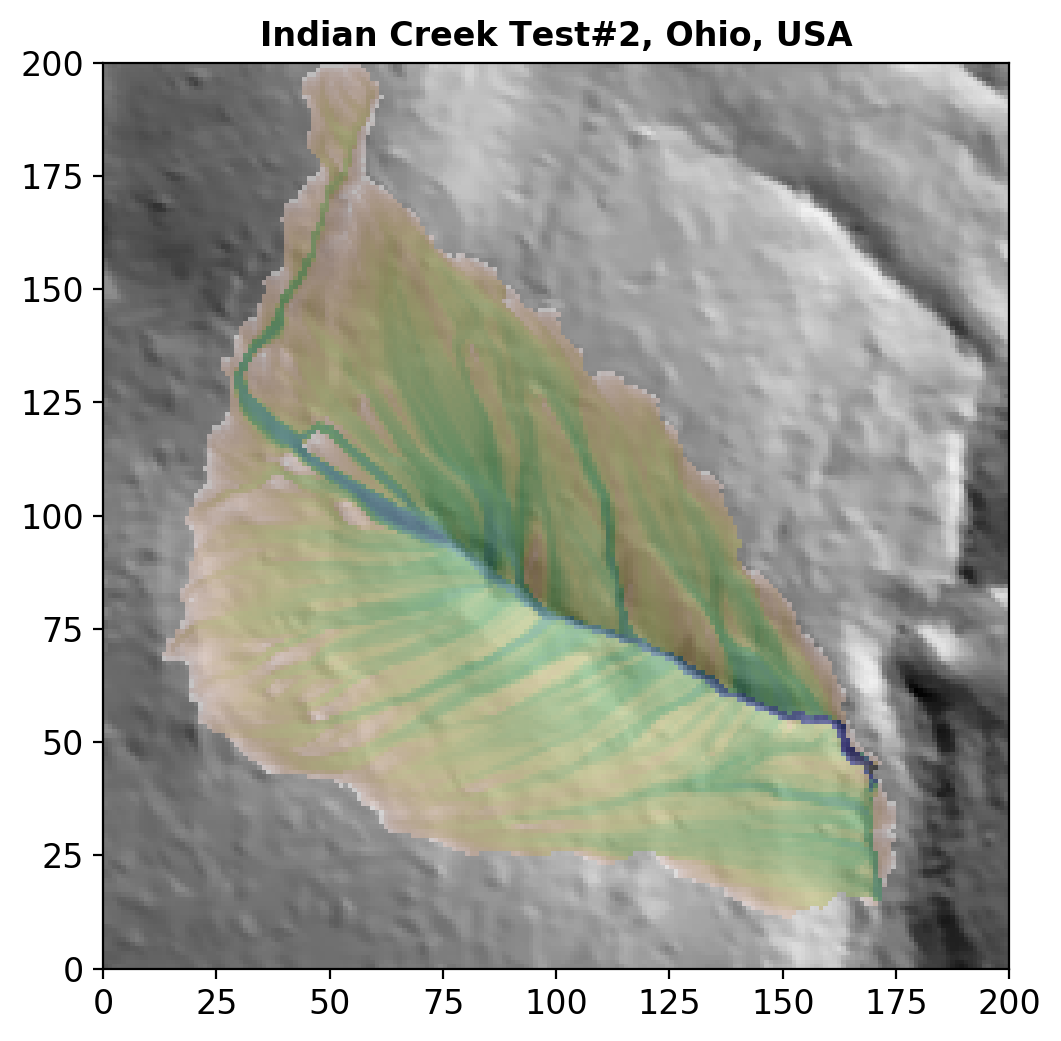

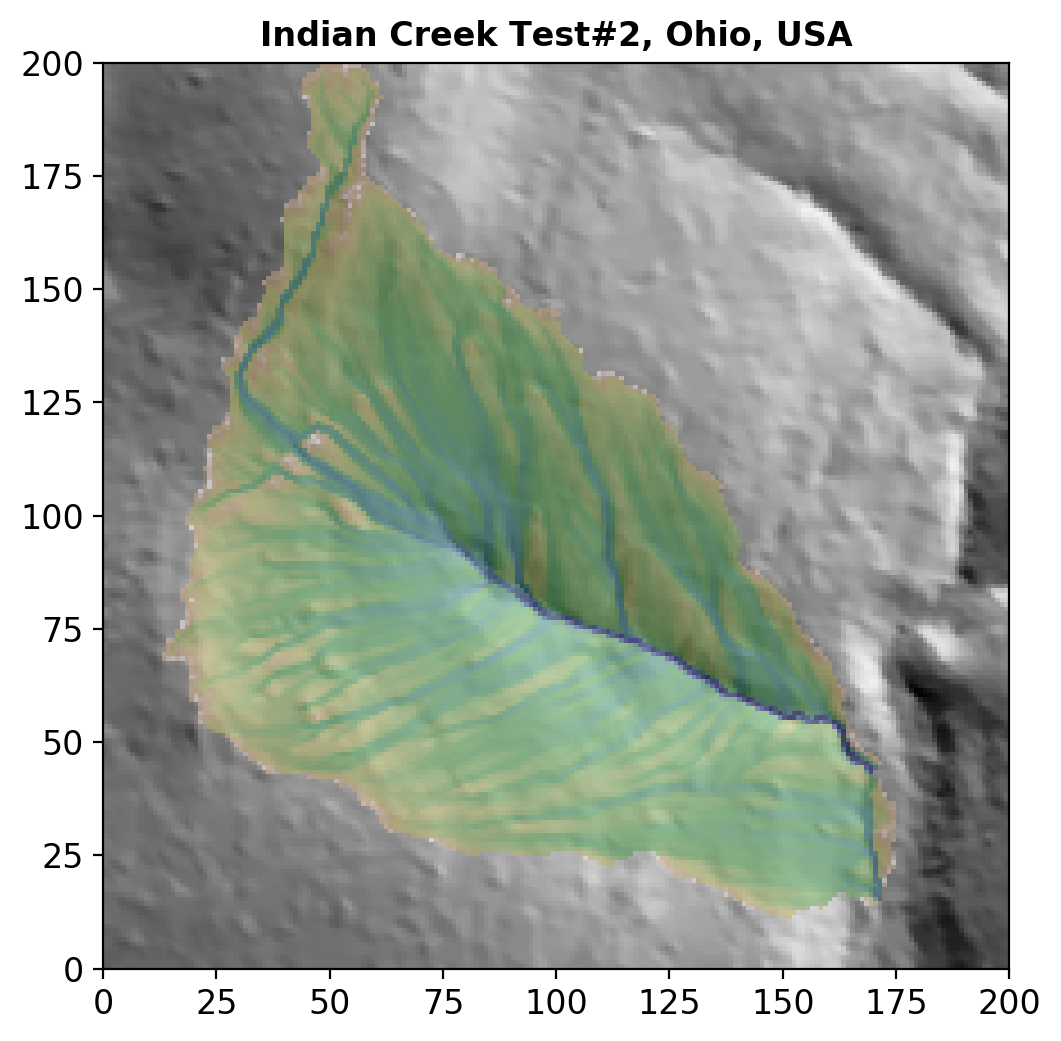

In [11]:
sl.plot.plot_flow_maps(window_size_factor=wsf)

## Analyze streamline distributions

In [12]:
# sl.analysis.do()

In [13]:
# sl.plot.plot_distributions()

## Map channels, segments & hillslope lengths

In [14]:
# sl.mapping.coarse_channel_threshold      = 200
# sl.mapping.coarse_segmentation_threshold = 200

In [15]:
sl.mapping.pass1()


**Pass#1 begin**
Channels...done
Connecting channel pixels...
...done
Thinning channels...skeletonizing...done
Mapping channel heads...
...done
Counting down channels...
...done
Flagging down channels...
...done
Labeling confluences...
...done
Flagging down channels...
...done
Flagging down channels...
...done
Flagging down channels...
...done
Segmenting channels...number of segments=4
...done
Linking hillslopes...
...done
Segmenting hillslopes...
...done
Subsegmenting left & right flanks...number of subsegments=9
...done
Prepare for mapping HSL from midslopes
Midslopes...done
Ridges...done
**Pass#1 end**


Recording figure "label"
Recording figure "channels"


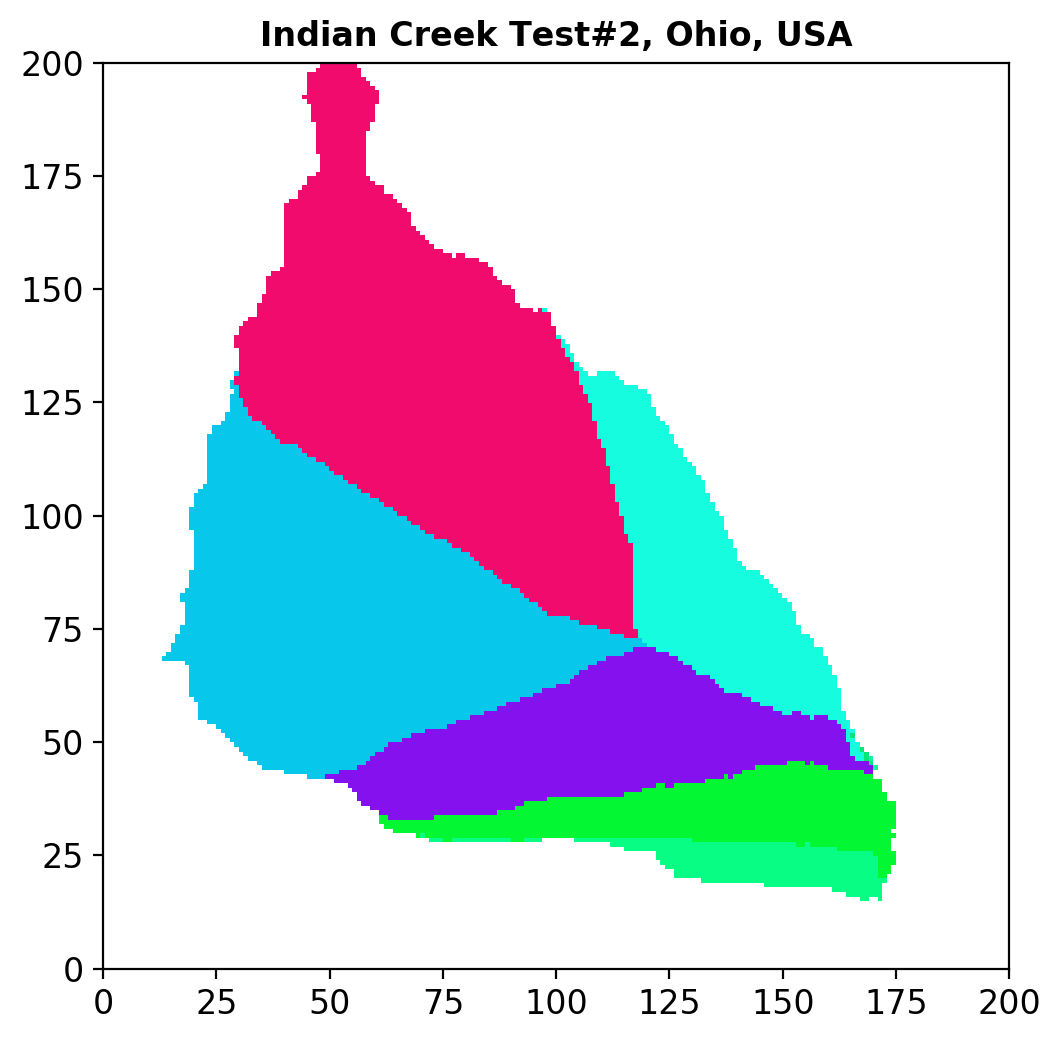

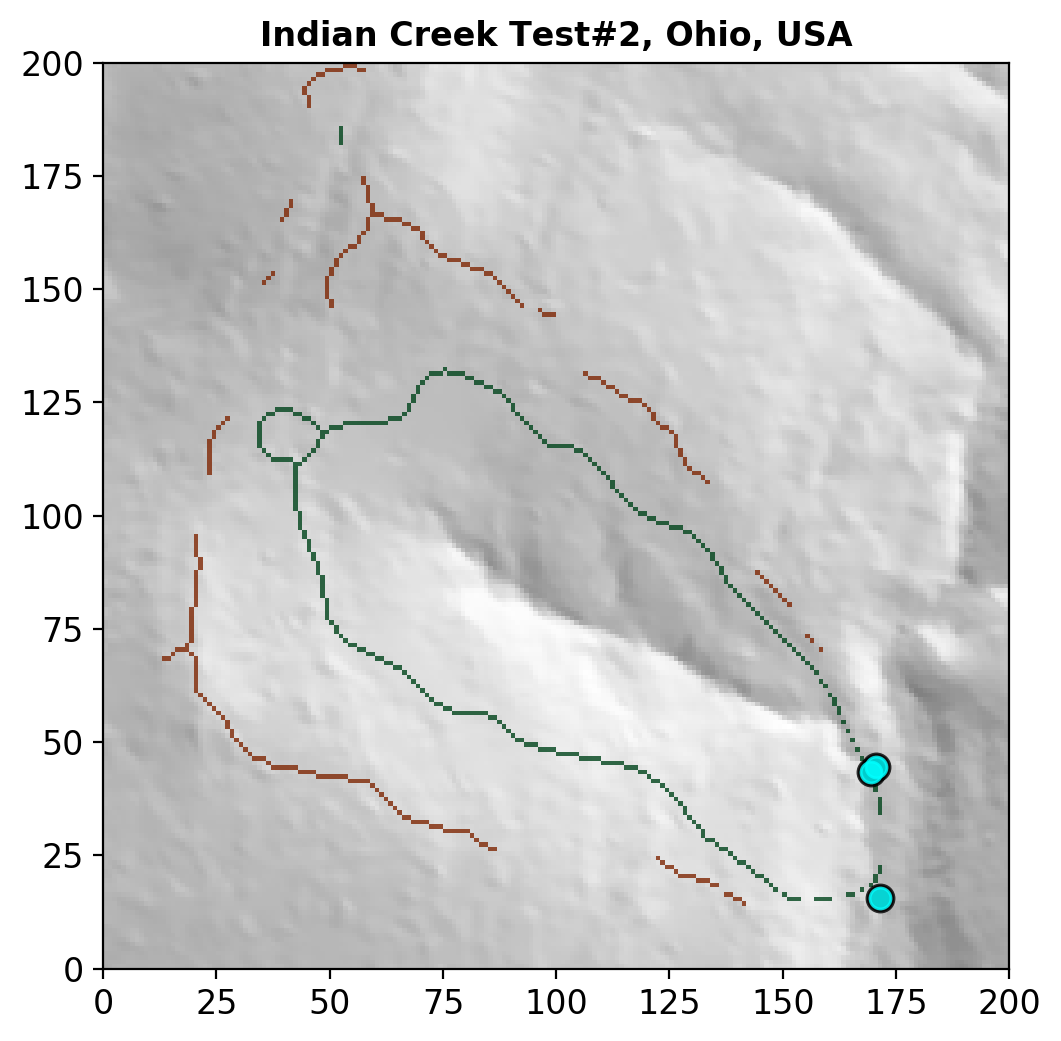

In [16]:
sl.plot.plot_segments(window_size_factor=wsf)
sl.plot.plot_channels(window_size_factor=wsf)

In [17]:
sl.mapping.pass2()


**Pass#2 begin**
0.0% -4 
Channel threshold = 150.0m
FMM mean HSL   = 5.0m
Trace mean HSL = 5.0m
12.5% -3 
Channel threshold = 56.5m
FMM mean HSL   = 30.1m
Trace mean HSL = 40.3m
25.0% -2 
Channel threshold = 76.6m
FMM mean HSL   = 22.5m
Trace mean HSL = 35.2m
37.5% -1 
Channel threshold = 57.8m
FMM mean HSL   = 23.7m
Trace mean HSL = 32.4m
50.0% +1 
Channel threshold = 202.9m
FMM mean HSL   = 51.3m
Trace mean HSL = 64.7m
62.5% +2 
Channel threshold = 212.0m
FMM mean HSL   = 33.2m
Trace mean HSL = 55.0m
75.0% +3 
Channel threshold = 134.3m
FMM mean HSL   = 48.0m
Trace mean HSL = 47.1m
87.5% +4    --- (problem measuring HSL using FM)
100.0% 
**Pass#2 end**


In [18]:
sl.mapping.pass3()


**Pass#3 begin**
Connecting channel pixels...
...done
Thinning channels...skeletonizing...done
Mapping channel heads...
...done
Counting down channels...
...done
Flagging down channels...
...done
Mapping hillslope lengths from midslopes...dilation with 51m (51-pixel) width filter...mean filtering with 60m (60-pixel) diameter disk...done
Computing hillslope aspect with median filter radii 4m (slope), 50m (uv)...done
Computing hillslope length-aspect function...done
Computing hillslope length-aspect statistics...done
**Pass#3 end**


## Viz channels & segments

Recording figure "channels"
Recording figure "label"


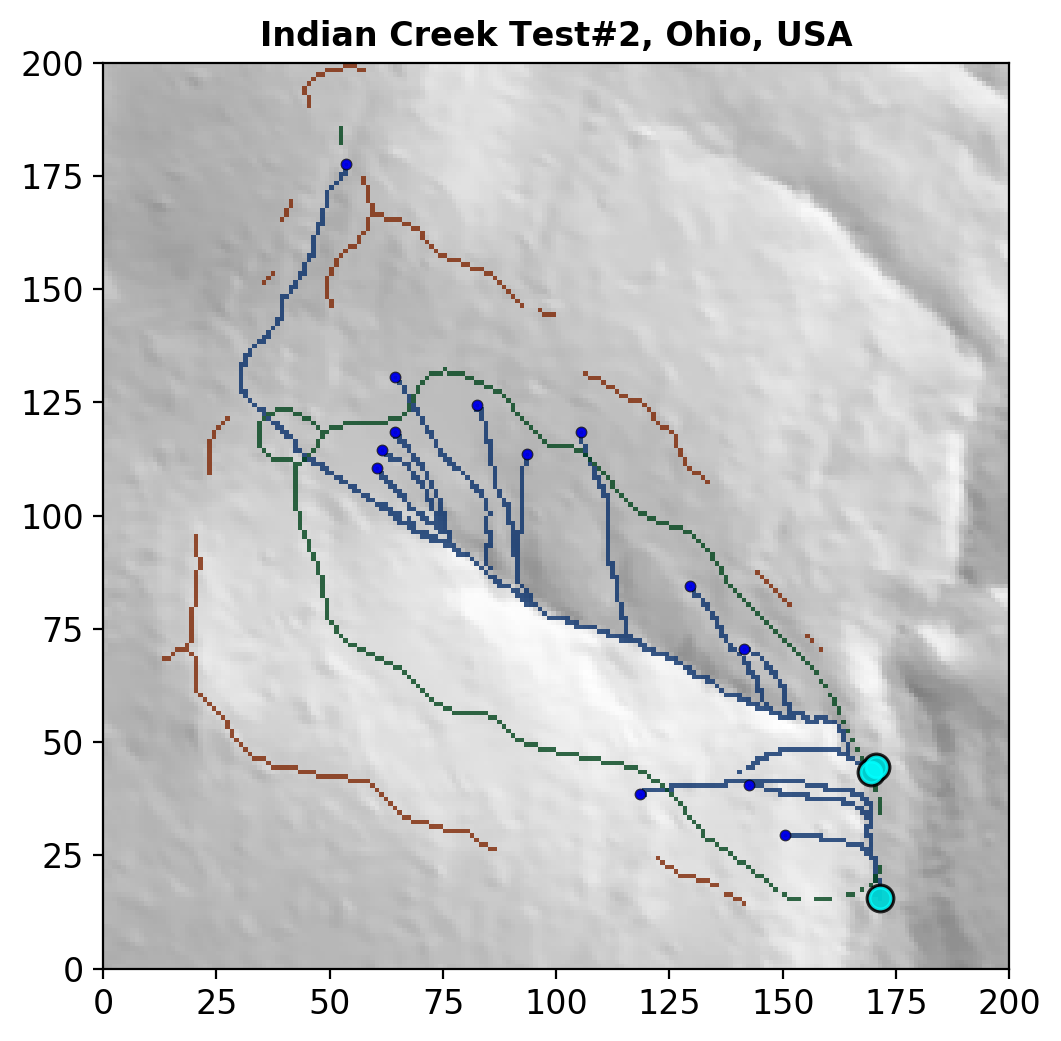

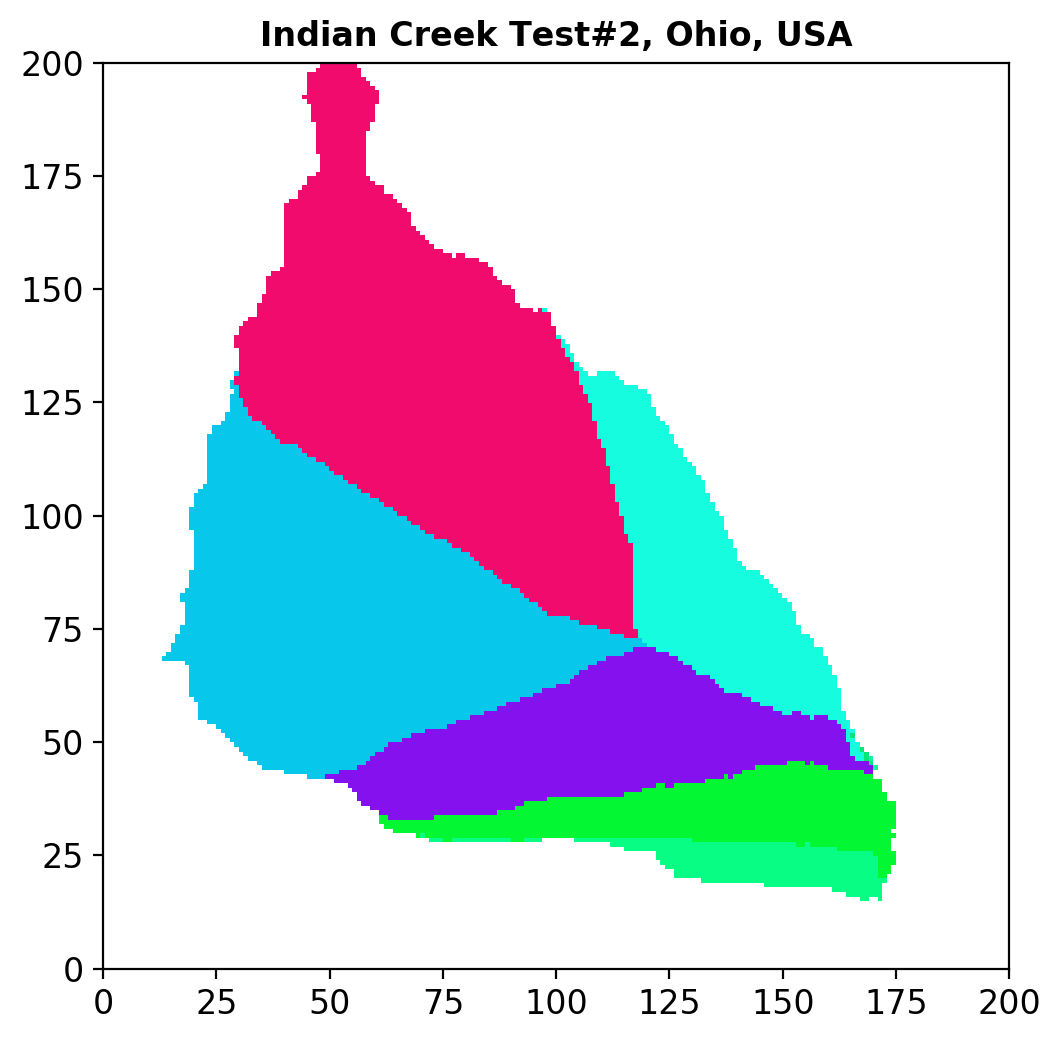

In [19]:
sl.plot.plot_channels(window_size_factor=wsf)
sl.plot.plot_segments(window_size_factor=wsf)

## Viz hillslope lengths

Recording figure "hsl"


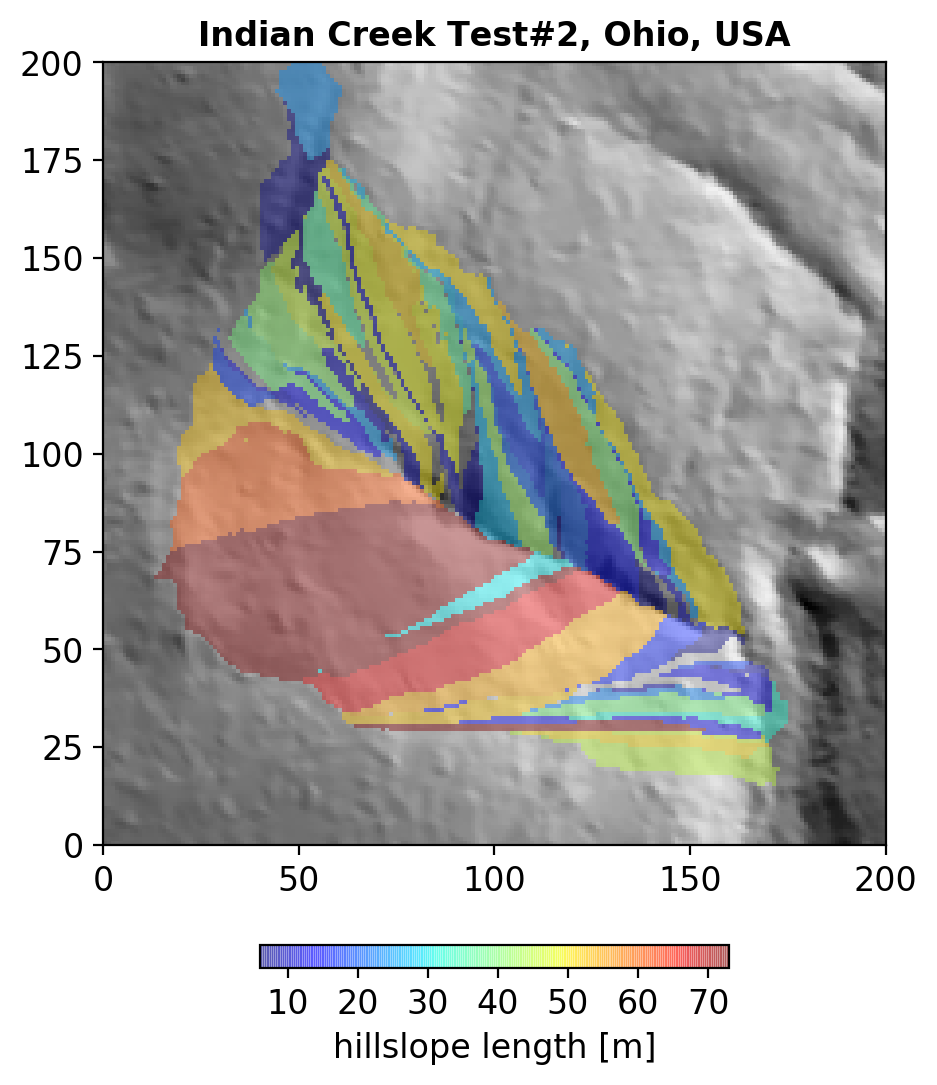

In [20]:
sl.plot.plot_hsl(window_size_factor=wsf)

Recording figure "hsl_contours"


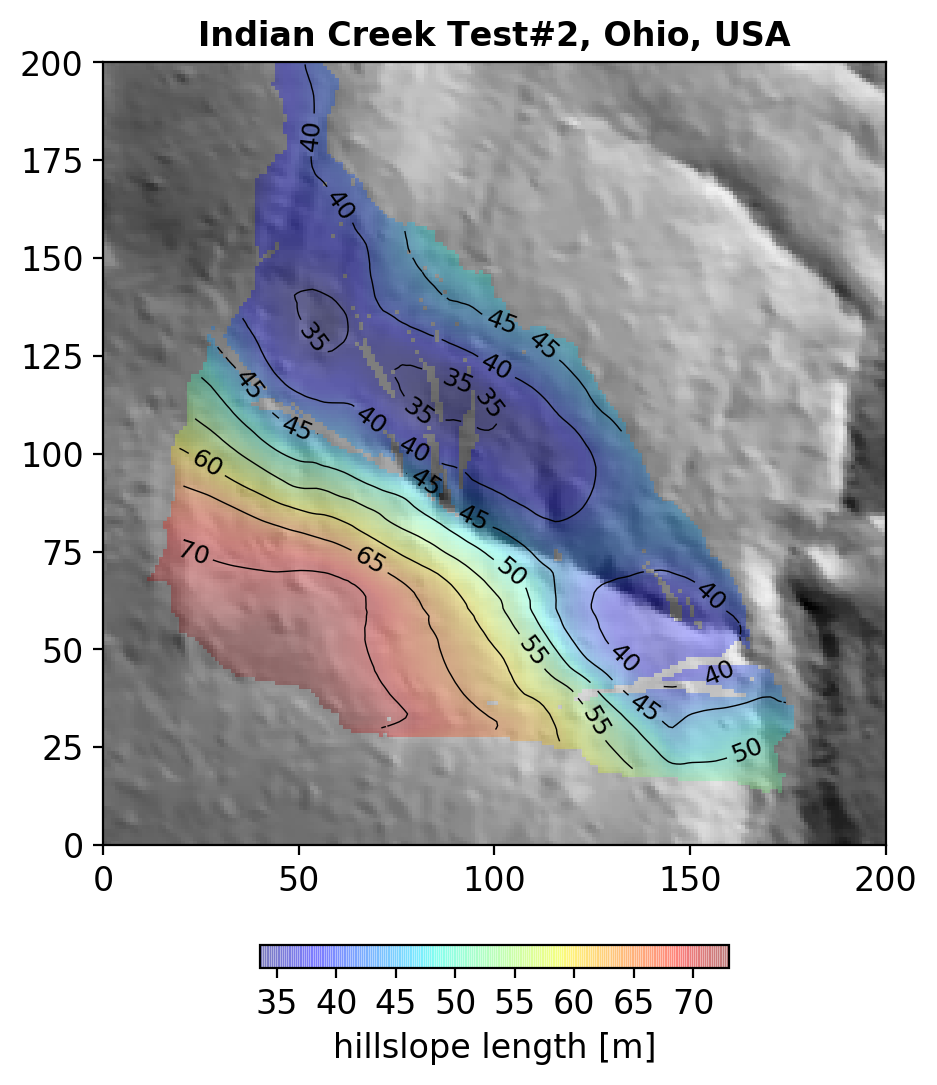

In [21]:
sl.plot.plot_hsl_contoured(window_size_factor=wsf)

## Viz aspect, hillslope length

Recording figure "aspect"


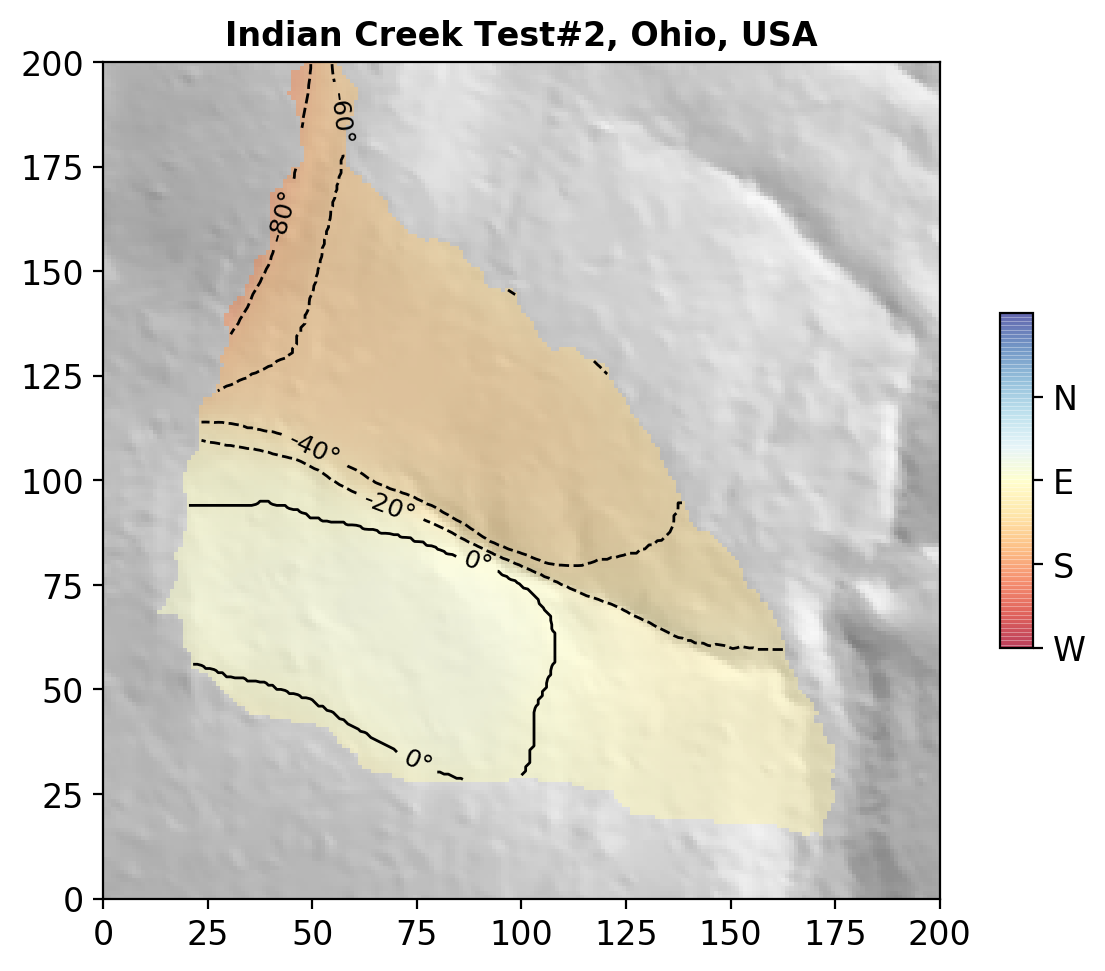

In [22]:
sl.plot.plot_aspect(window_size_factor=wsf)

In [23]:
sl.mapping.check_hsl_ns_disparity()

HSL mean ± σ(split), σ(all):	      44.2m ± 1.4m (split) 7.5m (all)
HSL N-S disparity:		      59.2mN vs 42.7mS   ∆≈16.5m
HSL N-S rel disparity vs variation:   37.3% (16.5m) NS vs 3.2% (1.4m)
HSL N-S disparity signal-noise ratio: ∆/σ = 11.7
					=> strong north bias
N-facing vs S-facing HSL distribution comparison tests
  for f(HSL_N,S) with N,S bounds 45°<|±aspect|<135° from east
N-S distribution test statistics not computed


Recording figure "hsl_aspect_distribution"


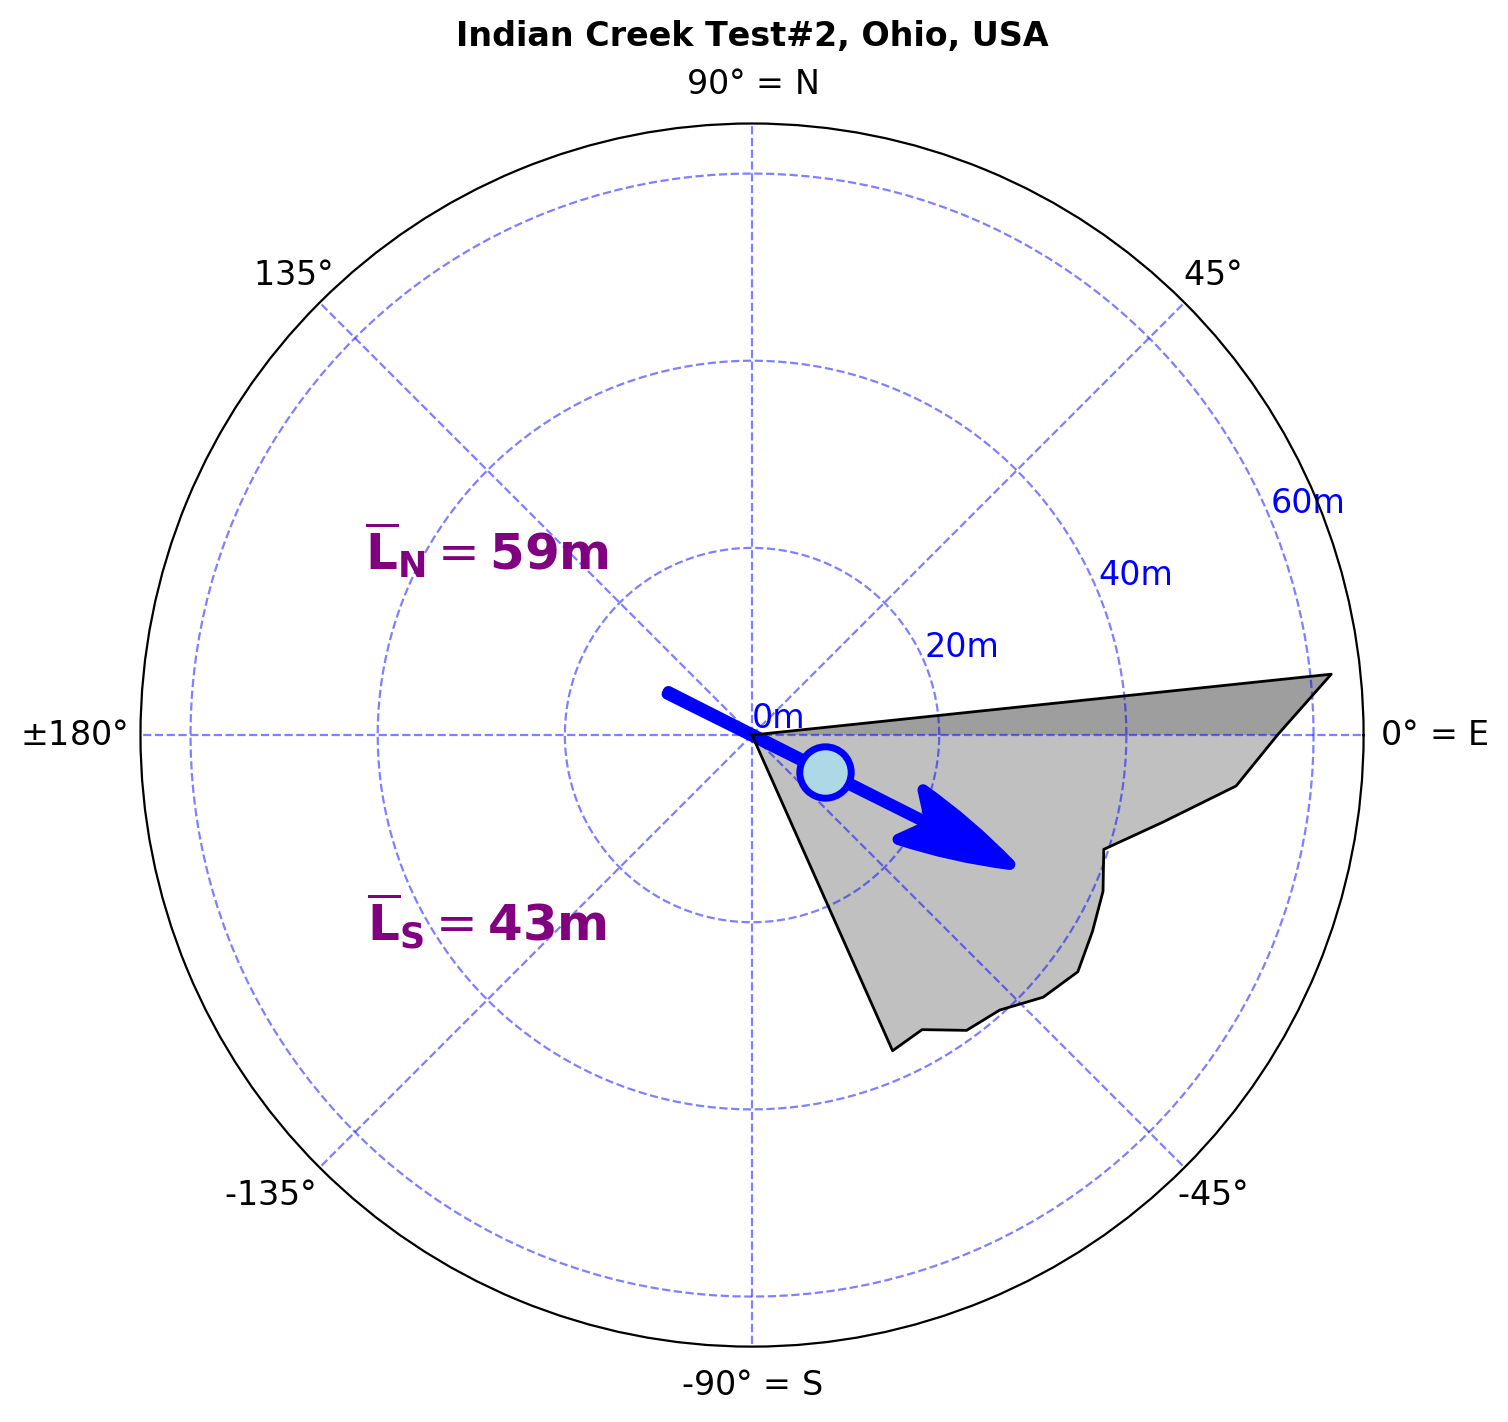

In [24]:
sl.plot.plot_hsl_aspect_distribution()

## Hillslope length stats

Plotting hillslope length distributions...
Recording figure "hsl_nsall_distbn"


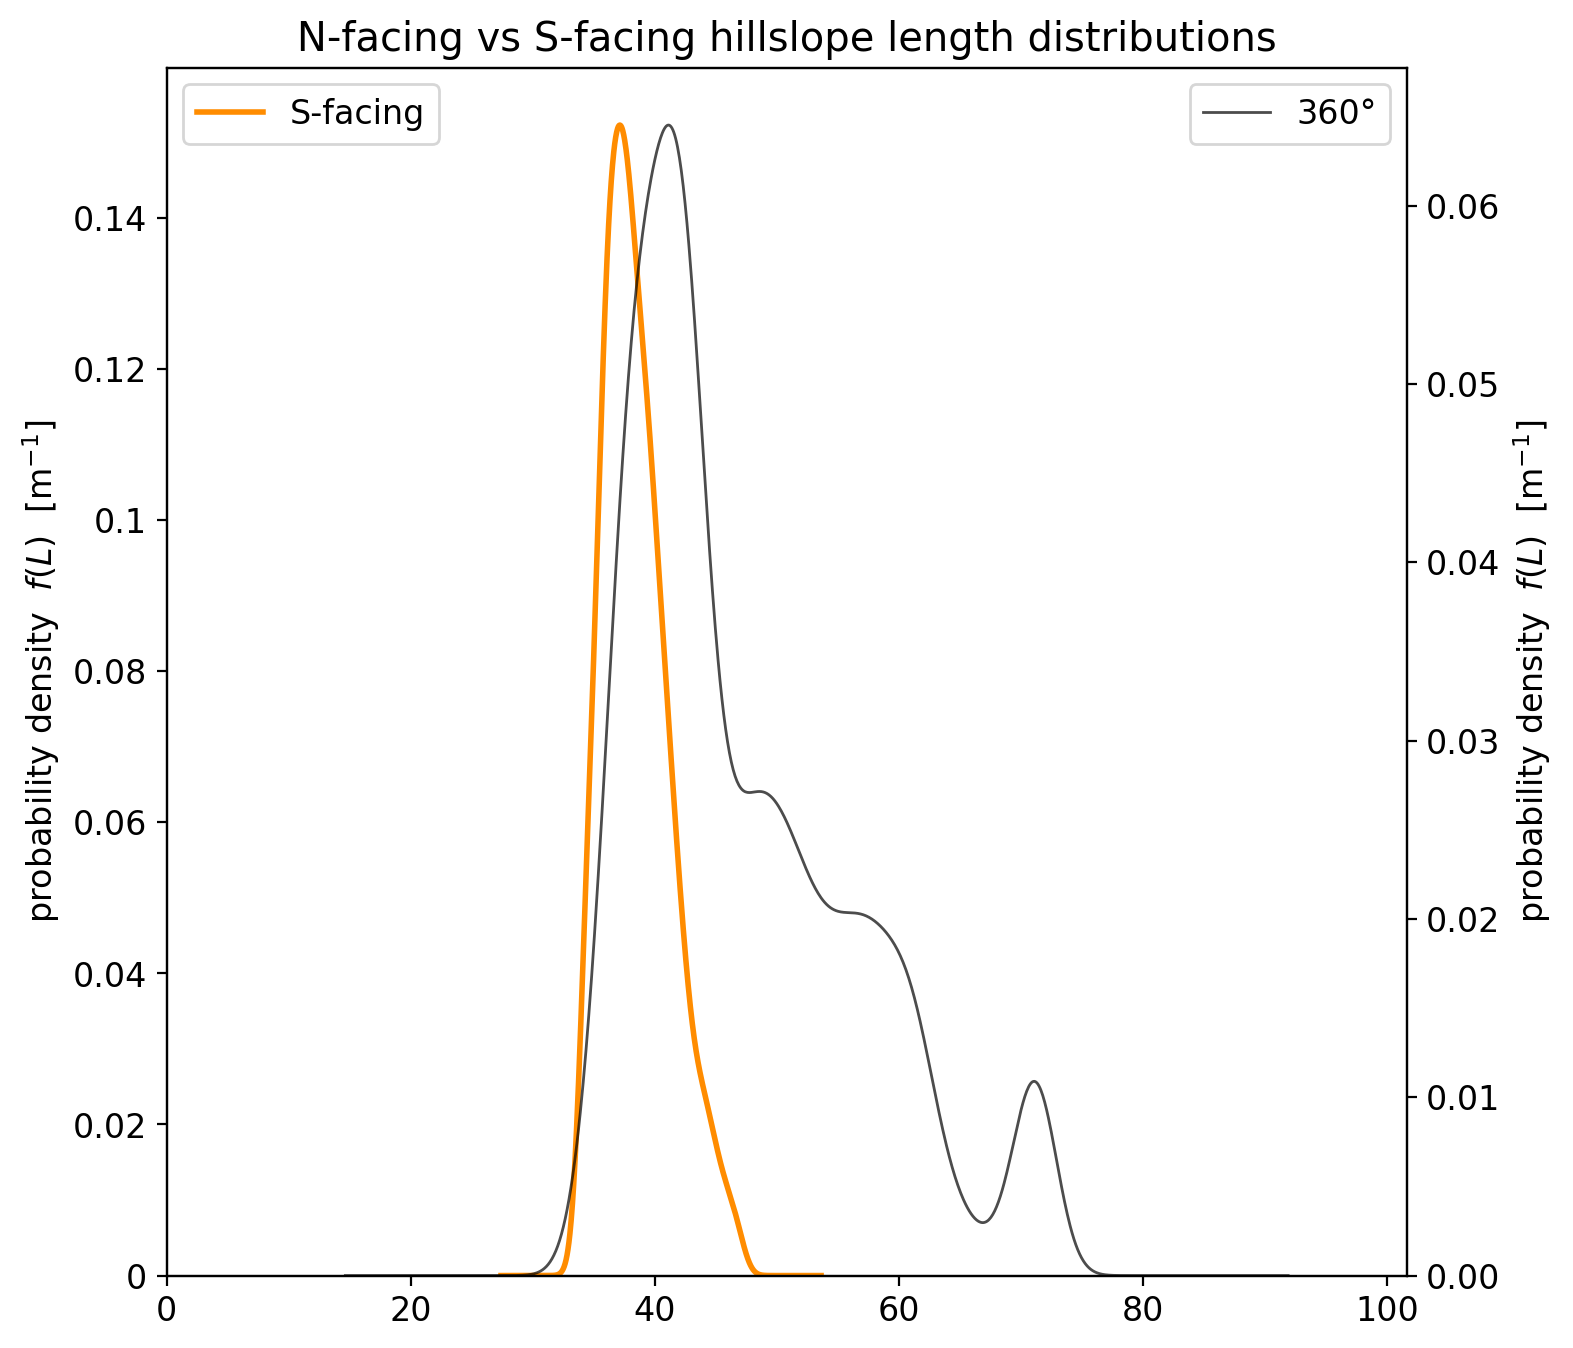

In [25]:
sl.plot.plot_hsl_distributions()

In [26]:
df = sl.mapping.hsl_stats_df
df.style.format("{:.3g}").set_properties(**{'font-size':'140%'}) \
     .set_caption('Hillslope length statistics:')
df.mean()

,,count,mean [m],stddev [m]
fine,coarse,,,


count        NaN
mean [m]     NaN
stddev [m]   NaN
dtype: float64

## Export plots

In [27]:
sl.save.do()


**Write results to files begin**
Saving maps...
<class 'tuple'>
/Users/colinstark/Work/Streamlines/slm/tests/IndianCreek_Test2/IndianCreek_Test2_dtm_mask.tif (204, 204)
/Users/colinstark/Work/Streamlines/slm/tests/IndianCreek_Test2/IndianCreek_Test2_basin_mask.tif (204, 204)
/Users/colinstark/Work/Streamlines/slm/tests/IndianCreek_Test2/IndianCreek_Test2_uv.tif (204, 204, 2)
/Users/colinstark/Work/Streamlines/slm/tests/IndianCreek_Test2/IndianCreek_Test2_slope.tif (204, 204)
/Users/colinstark/Work/Streamlines/slm/tests/IndianCreek_Test2/IndianCreek_Test2_mapping.tif (204, 204)
/Users/colinstark/Work/Streamlines/slm/tests/IndianCreek_Test2/IndianCreek_Test2_coarse_subsegment.tif (204, 204)
/Users/colinstark/Work/Streamlines/slm/tests/IndianCreek_Test2/IndianCreek_Test2_merged_coarse_mask.tif (204, 204)
/Users/colinstark/Work/Streamlines/slm/tests/IndianCreek_Test2/IndianCreek_Test2_hsl.tif (204, 204)
/Users/colinstark/Work/Streamlines/slm/tests/IndianCreek_Test2/IndianCreek_Test2_hsl_s